In [53]:
import pandas as pd 
import numpy as np 
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [54]:
data = pd.read_csv('Champagne.csv')
data.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [55]:
dates = pd.date_range(start='1964-01-01', freq='MS', periods=len(data))
dates[0:5]

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [56]:
data.set_index(dates,inplace=True)

In [57]:
sales_ts = data['Sales']
sales_ts[0:5]

1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Freq: MS, Name: Sales, dtype: int64

In [58]:
data = pd.DataFrame(sales_ts.copy())
data.head()

,Sales
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [59]:
train_len = int(np.ceil(len(data) * 0.75))

In [60]:
train=data[0:train_len] 
test=data[train_len:]
print('Train data length :',len(train))
print('Test  data length :',len(test))

Train data length : 79
Test  data length : 26


In [61]:
x_train = train.drop('Sales', axis=1)
x_test = test.drop('Sales', axis=1)
y_train = train[['Sales']]
y_test = test[['Sales']]

In [62]:
def exp_smooth(alpha):
    ft = 0
    forecast = []
    for i in range(0,len(data)):
        if(ft == 0):
            ft = data['Sales'][i]
            forecast.append(ft)
        else:
            ft = alpha*(data['Sales'][i]) + (1-alpha)*(ft)
            forecast.append(ft)
    return forecast

In [63]:
data['alpha=0.2'] = exp_smooth(0.2)
data['alpha=0.4'] = exp_smooth(0.4)
data['alpha=0.6'] = exp_smooth(0.6)
data['alpha=0.8'] = exp_smooth(0.8)

In [64]:
data

,Sales,alpha=0.2,alpha=0.4,alpha=0.6,alpha=0.8
1964-01-01,2815,2639.000000,2639.000000,2639.000000,2639.000000
1964-02-01,2672,2645.600000,2652.200000,2658.800000,2665.400000
1964-03-01,2755,2667.480000,2693.320000,2716.520000,2737.080000
1964-04-01,2721,2678.184000,2704.392000,2719.208000,2724.216000
1964-05-01,2946,2731.747200,2801.035200,2855.283200,2901.643200
1964-06-01,3036,2792.597760,2895.021120,2963.713280,3009.128640
1964-07-01,2282,2690.478208,2649.812672,2554.685312,2427.425728
1964-08-01,2212,2594.782566,2474.687603,2349.074125,2255.085146
1964-09-01,2922,2660.226053,2653.612562,2692.829650,2788.617029
1964-10-01,4301,2988.380842,3312.567537,3657.731860,3998.523406


In [65]:
data['alpha=0.2']

1964-01-01    2639.000000
1964-02-01    2645.600000
1964-03-01    2667.480000
1964-04-01    2678.184000
1964-05-01    2731.747200
1964-06-01    2792.597760
1964-07-01    2690.478208
1964-08-01    2594.782566
1964-09-01    2660.226053
1964-10-01    2988.380842
1964-11-01    3543.504674
1964-12-01    4297.203739
1965-01-01    3945.962991
1965-02-01    3651.770393
1965-03-01    3527.616314
1965-04-01    3475.293052
1965-05-01    3535.434441
1965-06-01    3474.347553
1965-07-01    3385.078042
1965-08-01    3059.862434
1965-09-01    3166.889947
1965-10-01    3428.311958
1965-11-01    4110.249566
1965-12-01    4959.599653
1966-01-01    4590.279722
1966-02-01    4273.423778
1966-03-01    4228.139022
1966-04-01    4087.111218
1966-05-01    4057.088974
1966-06-01    4042.871179
                 ...     
1970-04-01    5063.584454
1970-05-01    4636.267563
1970-06-01    4506.214050
1970-07-01    4448.371240
1970-08-01    3906.296992
1970-09-01    4169.237594
1970-10-01    4620.190075
1970-11-01  

In [66]:
len(data)

105

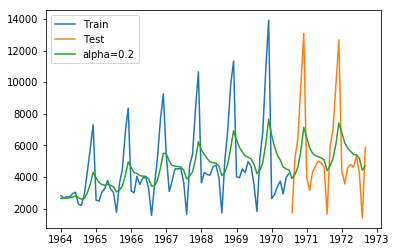

In [74]:
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(data['alpha=0.2'], label='alpha=0.2')
plt.legend(loc='best')

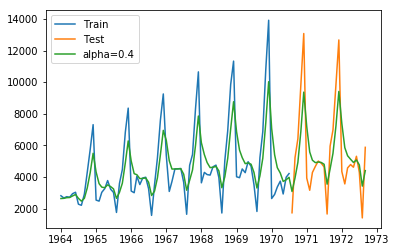

In [76]:
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(data['alpha=0.4'], label='alpha=0.4')
plt.legend(loc='best')

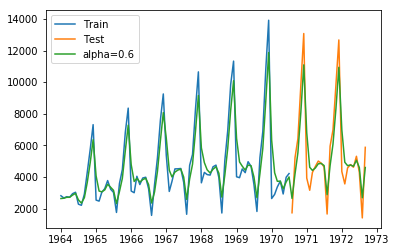

In [78]:
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(data['alpha=0.6'], label='alpha=0.6')
plt.legend(loc='best')

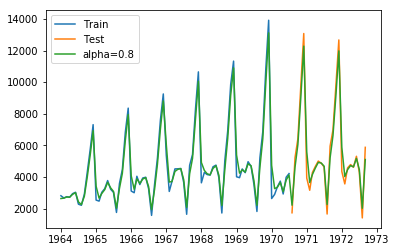

In [79]:
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(data['alpha=0.8'], label='alpha=0.8')
plt.legend(loc='best')

In [85]:
model = SimpleExpSmoothing(train['Sales'])

In [91]:
for i in np.arange(0.2,1,0.2):
    model_fit = model.fit(smoothing_level=i,optimized=False)
    y_hat_avg = test.copy()
    y_hat_avg['SES'] = model_fit.forecast(len(test['Sales']))
    rmse = np.sqrt(mean_squared_error(test.Sales, y_hat_avg.SES))
    rmse = round(rmse, 3)
    abs_error = np.abs(y_test['Sales']-y_hat_avg.SES)
    actual = y_test['Sales']
    mape = np.round(np.mean(abs_error/actual),4)
    print('smoothing_level : ',np.round(i,1),'RMSE : ' ,np.round(rmse,2) ,'MAPE : ',mape)

smoothing_level :  0.2 RMSE :  3064.14 MAPE :  0.4068
smoothing_level :  0.4 RMSE :  3252.21 MAPE :  0.4139
smoothing_level :  0.6 RMSE :  3241.12 MAPE :  0.4132
smoothing_level :  0.8 RMSE :  3184.79 MAPE :  0.4092


In [93]:
#As we can see above when alpha=0.8 the rmse and mape value is less.